<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Canvas by **5 PM on Thursday June 20**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook on Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)  

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [25 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

P($R_{5}$)= P($R_{5}$|F)P(F) + P($R_{5}$|S)P(S) + P($R_{5}$|T)P(T)

P($R_{5}$)= 0* $\frac{28}{40}$ + $\frac{1}{6}$ * $\frac{1}{4}$ + $\frac{1}{20}$ * $\frac{1}{20}$

P($R_{5}$)= $\frac{1}{24}$ + $\frac{1}{400}$

P($R_{5}$)= $\frac{53}{1200}$ = 0.0442

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

P($S$|$R_{5}$)= $\frac{P(R_{5}|S)P(S)}{P(R_{5}|S)P(S) + P(R_{5}|S^c)P(S^c)}$

P($S$|$R_{5}$)= $\frac{\frac{1}{24}}{\frac{1}{24} + \frac{1}{400}*\frac{3}{4}}$

P($S$|$R_{5}$)= $\frac{1}{1 + \frac{72}{1600}}$

P($S$|$R_{5}$)= $\frac{200}{209}$ = 0.9569

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

Independent if: P(A|B)=P(A), P(B|A)=P(B), and P(A$\bigcap$B)=P(A)*P(B)

1)
    P($R_{5}$|S)= $\frac{1}{6}$

   P($R_{5}$)= $\frac{53}{1200}$
    
$NO$

2)
  P(S|$R_{5}$)=$\frac{200}{209}$
  
  P(S)= $\frac{1}{4}$
  
  $NO$
  
3)
  P($R_{5}\bigcap$ S) = P($R_{5}$|S)P(S) = 0.0417
  
  P(A) * P(B) = 0.0110
  
  $NO$
  
  
**Therefore:** These actions are dependent on one another

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

P(F|$E_{1}$)=$\frac{P(E_{1}|F)P(F)}{P(E_{1}|F)P(F)+P(E_{1}|T)P(T)+P(E_{1}|S)P(S)}$

P(F|$E_{1}$)=$\frac{1*\frac{28}{40}}{1*\frac{28}{40} + \frac{4}{20}*\frac{2}{40} + \frac{4}{6}*\frac{10}{40}}$    

P(F|$E_{1}$)=$\frac{1*\frac{28}{40}}{1*\frac{28}{40} + \frac{1}{100} + \frac{1}{6}}$

P(F|$E_{1}$)=$\frac{1}{1 + \frac{40}{2800} + \frac{40}{168}}$

P(F|$E_{1}$)=$\frac{1}{1 + \frac{1}{70} + \frac{5}{21}}$

P(F|$E_{1}$)=$\frac{1}{1 + \frac{3}{210} + \frac{50}{210}}$

P(F|$E_{1}$)=$\frac{1}{1 + \frac{53}{210}}$

P(F|$E_{1}$)=$\frac{1}{\frac{263}{210}}$

P(F|$E_{1}$)=$\frac{210}{263}$ = 0.7985

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

P(F|$E_{N}$)=$\frac{(P(E_{1}|F))^nP(F)}{(P(E_{1}|F))^nP(F)+(P(E_{1}|T))^nP(T)+(P(E_{1}|S))^nP(S)}$

In [35]:
#--------------Dice-Probabilities-------------------
probFSD=28/40
probSSD=10/40
probTSD=2/40

#-------------Probabilities-Given-First-Four-Values-(Number-In-Name-Is-Dice-Number)-----------
probGivenFour=1
probGivenSix=4/6
probGivenTwenty=4/20

def prob_four(n):
    #---Exponentiating-Probabilities-Given-Dice-Sides------------
    probFourToN=probGivenFour ** n
    probSixToN=probGivenSix ** n
    probTwentytoN=probGivenTwenty ** n
    
    #---Multiplying-The-Probabilities-Following-The-Formula-----------
    fourSide=probFourToN*probFSD
    twentySide=probTwentytoN*probTSD
    sixSide=probSixToN*probSSD
    
    #---Finish-Plugging-In-Values-And-Return-The-Answer---------------
    denominator=fourSide+sixSide+twentySide
    result=fourSide/denominator
    return result

print("The Probability of a four-sided dice given {} rolls is {}".format(1,prob_four(1)))

#--------Extra-Information-For-Curiosity's-sake------------------------------------
print("The Probability of a four-sided dice given {} rolls is {}".format(4,prob_four(4)))
print("The Probability of a four-sided dice given {} rolls is {}".format(5,prob_four(5)))
print("The Probability of a four-sided dice given {} rolls is {}".format(6,prob_four(6)))
print("The Probability of a four-sided dice given {} rolls is {}".format(20,prob_four(20)))

The Probability of a four-sided dice given 1 rolls is 0.7984790874524715
The Probability of a four-sided dice given 4 rolls is 0.9340024326892286
The Probability of a four-sided dice given 5 rolls is 0.9550605655503714
The Probability of a four-sided dice given 6 rolls is 0.9695947902893278
The Probability of a four-sided dice given 20 rolls is 0.9998926084413913


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

You are more than a 95% likelihood to have a 4-sided dice after 5 rolls. You would likely be able to tell what dice you have when you feel it in your hand, but just to be sure, your chances go above 95% at 5 rolls while 4 rolls gives a percentage of just over 93.

***
<a/ id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

Thought collection:
    
////Connections from E: {R,G,L,C}, each with $\frac{1}{4}$ probability

////Connections from R: {E,G}, each with $\frac{1}{2}$ probability, 0 to the Library

////Connections from G: {R,E,L,H}, each with $\frac{1}{4}$ probability, 1 to the library

////Connections from C: {E,L,H}, each with $\frac{1}{3}$ probability, 1 to the library
    
////Connections from L: {G,E,C,H}, each with $\frac{1}{4}$ probability, 0 to the library

////Total connections to consider: E->R->E, E->R->G, E->G->R, E->G->E, E->G->L, E->G->H, E->L->E, E->L->G, E->L->H, E->L->C,
E->C->E, E->C->L, E->C->H  (13)

NOT EQUAL PROBABILITY

Ones that get to the library: E->G->L, E->C->L

$\frac{1}{4}$ * $\frac{1}{4}$ + $\frac{1}{4}$ * $\frac{1}{3}$

$\frac{1}{16}$ + $\frac{1}{12}$=0.1458

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

Possibilities from R: R->G->R, R->G->L, R->G->E, R->G->H, R->E->R, R->E->G, R->E->L, R->E->C

Number with gym first: $\frac{4}{8}$

Number with gym total: $\frac{5}{8}$ = 0.625

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1) In terms of first move, Available Places Stella: 3;   Available Places Oscar:4

{C,L,G}$\bigcup${C,L,G,R}-> {CC,CL,CG,CR,LC,LL,LG,LR,GC,GL,GG,GR}

Option Number: 12;  Options shared: 3

Probability they will meet up at the same location on first move: $\frac{1}{4}$

2) Two move possibilities Oscar: E->R->E, E->R->G, E->G->R, E->G->E, E->G->L, E->G->H, E->L->E, E->L->G, E->L->H, E->L->C,
E->C->E, E->C->L, E->C->H (From Part 1) (13 possibilities) (3 End on Hill)

Two move possibilities Stella: H->C->H, H->C->L, H->C->E, H->L->H, H->L->C, H->L->E, H->L->G, H->G->H, H->G->L, H->G->E, H->G->R (11 Possibilities) (3 End on Hill)

P(H|O)=$\frac{1}{4}$ * $\frac{1}{4}$ + $\frac{1}{4}$ * $\frac{1}{4}$ + $\frac{1}{4}$ * $\frac{1}{3}$ = 0.2083 

P(H|S)=$\frac{1}{3}$ * $\frac{1}{3}$ + $\frac{1}{3}$ * $\frac{1}{4}$ + $\frac{1}{3}$ * $\frac{1}{4}$ = 0.2778

0.2083 * 0.2778 = 0.0579

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [29]:
#---------------Connection-Definitions----------------------
E=np.array(["R","G","L","C"])
R=np.array(["E","G"])
G=np.array(["R","E","L","H"])
L=np.array(["E","G","H","C"])
C=np.array(["H","E","L"])
H=np.array(["G","L","C"])

#---------------Turn-Strings-From-Connections-Into-The-Arrays--------------------
def string_to_array(string):
    if string=="E":
        return E
    if string=="R":
        return R
    if string=="G":
        return G
    if string=="L":
        return L
    if string=="C":
        return C
    else:
        return H
    
#Function structure:
#defining a true false variable (as 1 or 0) to send back
#Randomizing movement
#check if condition is met; if so, variable is set to 1
#Return the true false variable

#----------------Checks-If-Oscar-Ends-At-Library---------------------------
def oscar_library(start):
    isLibrary=0
    first=np.random.choice(start)
    end=np.random.choice(string_to_array(first))
    if end=="L":
        isLibrary=1
    return isLibrary

#--------------Check-If-Stella-Ends-At-Gym----------------------
def stella_gym(start):
    isGym=0;
    first=np.random.choice(start)
    end=np.random.choice(string_to_array(first))
    if first=="G" or end=="G":
        isGym=1
    return isGym

#----------------Checks-If-Both-Octopuses-End-At-The-Same-Place-----------------
def o_s_meeting(start1,start2):
    meet=0
    oscar=np.random.choice(start1)
    stella=np.random.choice(start2)
    if oscar==stella:
        meet=1
    return meet

#-------------Checks-If-Both-Octopuses-End-On-The-Hill-----------------------
def end_hill(start1,start2):
    isHill=0
    oscarOne=np.random.choice(start1)
    stellaOne=np.random.choice(start2)
    oscarTwo=np.random.choice(string_to_array(oscarOne))
    stellaTwo=np.random.choice(string_to_array(stellaOne))
    if stellaTwo=="H" and oscarTwo=="H":
        isHill=1
    return isHill

#------------Accumulators-For-10000-Attempts-Of-The-Functions-----------------
attempts=10000
libResult=np.zeros(attempts)
gymResult=np.zeros(attempts)
meetResult=np.zeros(attempts)
hillResult=np.zeros(attempts)

#-----------Randomize-10000-Times-As-A-Probability-Estimation------------------
for i in range(0,attempts-1):
    libResult[i]=oscar_library(E)
    gymResult[i]=stella_gym(R)
    meetResult[i]=o_s_meeting(E,H)
    hillResult[i]=end_hill(E,H)
    
#--------------Turn-Randomized-Results-Into-Probability------------------
libVisits=np.sum(libResult==1)/attempts
gymVisits=np.sum(gymResult==1)/attempts
meeting=np.sum(meetResult==1)/attempts
endHill=np.sum(hillResult==1)/attempts

#----------------Print-Results-----------------------
print("The probability of Oscar ending at the library is {}".format(libVisits))
print("The probability of Stella going to the gym within two attempts is {}".format(gymVisits))
print("The probability of both octopuses meeting up is {}".format(meeting))
print("The probability of both octopuses ending on the hill is {}".format(endHill))

The probability of Oscar ending at the library is 0.1427
The probability of Stella going to the gym within two attempts is 0.6174
The probability of both octopuses meeting up is 0.2584
The probability of both octopuses ending on the hill is 0.0596


This is a reasonable approximation as it randomizes the movements in real time lots of times to give an average. The probability what each value comes to upon many attemps, so going through each many times ends in the probability. The more attempts, the closer it will be, but it goes to a value of the probability over trial amounts

***
<a/ id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

(each two letters, first being tony, second being dan)

$\Omega$= {HM,MH,HHHM,HHMH,MMHM,MMMH...}

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

P(T|E)=$\frac{p(1-q)}{p+q-2pq}$

**Part C**: Explain why events $C$ and $T$ are independent. 

C and T are independent because Tony winning on its own has no bearing on the continuation. It is T in conjunction with D that determines if the duel is continued (C). C cannot be determined simply by looking at T, making them independent events.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

P(T)=P($T^c$|D)P(D)+P(T|$D^c$)P($D^c$)+P($T^c$|$D^c$)P($D^c$)+P(T|D)P(D)

    P($T^c$|D)P(D)=$T^c$, P(T)=0

    P(C)=P($T^c$|$D^c$)P($D^c$)+P(T|D)P(D); *P(T|C) for P(T) portion

P(T)=0+p(1-q)+((1-q)(1-p)+pq)P(T|C)

P(T)=p(1-q)+((1-q-p+pq)+pq)P(T|C)

P(T)=p(1-q)+(1-q-p+2pq)P(T|C)

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

P(T)=p(1-q)+(1-q-p+2pq)P(T)

1=$\frac{p(1-q)}{P(T)}$+(1-q-p+2pq)

1-$\frac{p(1-q)}{P(T)}$=1-q-p+2pq

-$\frac{p(1-q)}{P(T)}$=-q-p+2pq

$\frac{p(1-q)}{P(T)}$=q+p-2pq

$\frac{1}{P(T)}$=$\frac{q+p-2pq}{p(1-q)}$

P(T)=$\frac{p(1-q)}{q+p-2pq}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

These are the same because E and T are independent. Just as C relies on the combination of T and D, E cannot pull anything from just one. The rules of independence show P(T|E)=P(T) as one of the three rules, along with P(E|T)=P(E) and P(T$\bigcap$E)=P(T)P(E). It would be reasonable to say these other rules would also fit given independence.

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

It seems you went about this route in order to generalize the formula instead of just making us plug and chug. This makes sense in the context that there is a given item to prove and the content is not too hefty, as to be thesibly done by a human in a reasonable amount of time. Of course this goes off the assumption that all steps are definable in a finite sample space and the events have independence taken into account.

***
<a/ id='p5'></a>
[Back to top](#top)

### [25 points] Problem 4

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


| x | 1 | 2 | 3 | 4 | 5 | 6 |  
|---|---|---|---|---|---|---|   
| 1 | 1 | 1 | 0 | 0 | 0 | 0 |
| 2 | 1 | 1 | 1 | 0 | 0 | 0 |
| 3 | 0 | 1 | 1 | 1 | 0 | 0 |
| 4 | 0 | 0 | 1 | 1 | 1 | 0 |
| 5 | 0 | 0 | 0 | 1 | 1 | 1 |
| 6 | 0 | 0 | 0 | 0 | 1 | 1 |
 
                                           0=Not Close
                                           1=Close
                                           
P(C)=2($\frac{2}{36}$)+4($\frac{3}{36}$)=$\frac{16}{36}$=$\frac{4}{9}$=0.44444

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [26]:
#-----------------Definitions---------------------
die=np.array([1,2,3,4,5,6]) #all values a dice can have
diceOne=np.random.choice(die,size=10000)
diceTwo=np.random.choice(die,size=10000) #Randomizing values for each dice for 10000 rolls
result=np.zeros(len(diceOne)) #An accumulator checking if values are close

#-----------------Math---------------------------------
for i in range(0,9999):
    distance=diceTwo[i]-diceOne[i] #The difference between the two dice rolls
    if distance<=1 and distance>=-1: #If they are close, they should only differ by one, which is -1, 0, or 1 when subtracting
        result[i]=1 #accumulate simple 1=close for the close. It is already 0 for not close and does not need change

#----------------Result-and-Print---------------------------
prob=np.sum(result==1)/len(result)
print("The values are close about this often: {}".format(prob))

The values are close about this often: 0.4404


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

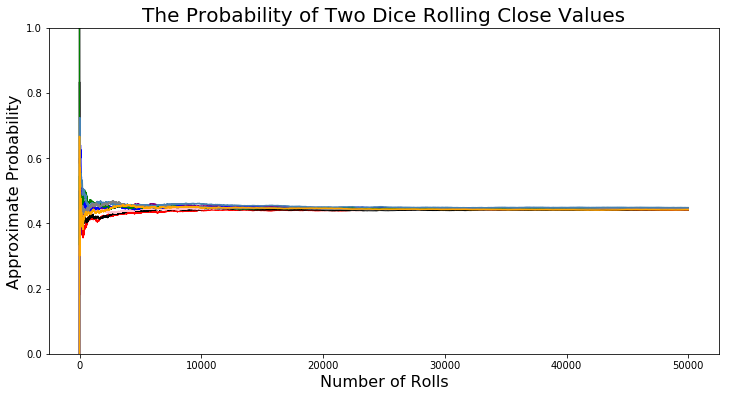

In [44]:
#--------------Standard-Definitions--------------------
die=np.array([1,2,3,4,5,6]) #dice values
sizeArrays=50000 #size
color=np.array(["red","black","pink","purple","blue","green","steelblue","gray","orange", "navyblue"])
#colors to make each trial pop out from the others

#---------------Graph-Setup-(Following-Notebook-4)------------------------------------
fig, ax=plt.subplots(figsize=(12,6)) #Call to make the graphing area
ax.set_ylim(0,1) #Limiter left in for essentially zooming and seeing what happens
ax.set_title("The Probability of Two Dice Rolling Close Values", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Approximate Probability", fontsize=16) #Labels

#-------------------All-The-Work----------------------------
for w in range(0,9):
    #---------Zero/Reroll-Values--------------------------
    diceOne=np.random.choice(die,size=sizeArrays)
    diceTwo=np.random.choice(die,size=sizeArrays)
    result=np.zeros(sizeArrays)
    graphAver=np.zeros(sizeArrays)
        
    #-----------Checking-Closeness------------------
    distance=diceTwo-diceOne
    for i in range(0,sizeArrays):
        distanceHolder=distance[i]
        if distanceHolder<=1 and distanceHolder>=-1:
            result[i]=1
    
    #-----------Obtaining-Values-to-Graph-and-Graphing--------------
    for i in range(0,sizeArrays):
        graphAver[i]=np.sum(result[:i+1]==1)/len(result[:i+1])
    ax.plot(graphAver, color=color[w])

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

Each run starts differently than all the others with the colors all showing at different levels. However, as it reaches the end, no matter how different they were, they morph into a single line just around the value of $\frac{4}{9}$. I even played around with the Y limiter (I left it in so you can play with it too, though you probably already know what happens) and saw how, even that zoomed in, they all go to a similar value in the end.